## Importaciones utilizadas

In [44]:
## Herramientas para trabajar el dato
import pandas as pd
import numpy as np


## Herramientas de visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Datos a utilizar

In [85]:
clientes_csv = pd.read_csv('Datasets/Clientes.csv',delimiter=';',decimal=',')
clientes_csv.name = 'Clientes'

compra_csv = pd.read_csv('Datasets/Compra.csv',delimiter=',',decimal=',')
compra_csv.name = 'Compra'

gasto_csv = pd.read_csv('Datasets/Gasto.csv',delimiter=',',decimal=',')
gasto_csv.name = 'Gasto'

localidades_csv = pd.read_csv('Datasets/Localidades.csv',delimiter=',',decimal=',')
localidades_csv.name = 'Localidades'

proveedores_csv = pd.read_csv('Datasets/Proveedores.csv',delimiter=',',decimal=',',encoding="latin-1")
proveedores_csv.name = 'Proveedores'

sucursales_csv = pd.read_csv('Datasets/Sucursales.csv',delimiter=';',decimal=',')
sucursales_csv.name = 'Sucursales'

venta_csv = pd.read_csv('Datasets/Venta.csv',delimiter=',',decimal=',')
venta_csv.name = 'Venta'

canaldeventa_csv = pd.read_excel('Datasets/CanalDeVenta.xlsx')
canaldeventa_csv.name = 'Canal de venta'

tipogasto_csv = pd.read_csv('Datasets/TiposDeGasto.csv',delimiter=',',decimal=',')
tipogasto_csv.name = 'Tipo de Gasto'



##### Datos Delta

In [46]:
venta2_csv = pd.read_csv('Datasets/Venta_Dic2020.csv',delimiter=',',decimal=',')
venta2_csv.name = 'Venta delta'
clientes2_csv = pd.read_csv('Datasets/Clientes_Dic2020.csv',delimiter=';',decimal=',')
clientes2_csv.name = 'Clientes delta'


## Funciones para analizar la calidad del dato

Esta funcion calcula de manera general el porcentaje de valores faltantes,outliers y de valores sin error del DataFrame ingresado

In [71]:
def analisis_csv_general(csv):
    cantidad_columnas = 0
    valores_faltantes = 0
    outliers = 0
    sin_errores = 0
    for column in csv:

        if csv[column].dtype == 'O':    
            valores_faltantes = valores_faltantes + round((csv[column].isnull().sum() * 100) / csv[column].count(),2 )     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
            sin_errores = sin_errores + round(100 - valores_faltantes,2)
            outliers = outliers + 0
        else:
            minimo = csv[column].mean() - 3*csv[column].std()          ## VARIABLES PARA CALCULAR OUTLIER 
            maximo = csv[column].mean() + 3*csv[column].std()
            outliers =  outliers + round((((csv[column][csv[column] < minimo].count() + csv[column][csv[column] > maximo].count())) * 100) / csv[column].count(),2)   ## REGLA 3 SIGMAS PARA OUTLIERS
            valores_faltantes = valores_faltantes + round((csv[column].isnull().sum() * 100) / csv[column].count(),2)     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
        cantidad_columnas = cantidad_columnas + 1
    
    outliers = round(outliers/cantidad_columnas,2)
    valores_faltantes = round(valores_faltantes/cantidad_columnas,2)
    sin_errores = round(100 - valores_faltantes - outliers,2)

    lista = [outliers,valores_faltantes,sin_errores]    


        ##   CONFIGURACION DEL GRAFICO 
    plt.figure(figsize=(8,8))
    plt.title("Grafico de calidad general de " + csv.name)
    graph = plt.bar(['Outliers','Valores faltantes','Valores sin error'],lista,color=['Red','Orange', 'Blue'])    
    i = 0
    for p in graph:           ## AGREGA EL NUMERO CON EL PORCENTAJE
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
            y+height*1.01,
            str(lista[i])+'%',
            ha='center',
            weight='bold')
        i+=1
        
    plt.show()
        
    
    print('Porcentaje de valores faltantes en la tabla',csv.name,'es :',valores_faltantes,'%')
    print('Porcentaje de outliers en la tabla',csv.name,'es :',outliers,'%')
    print('Porcentaje de valores sin error en la tabla',csv.name,'es :',sin_errores,'%')
    print('---------------------------------------------------')

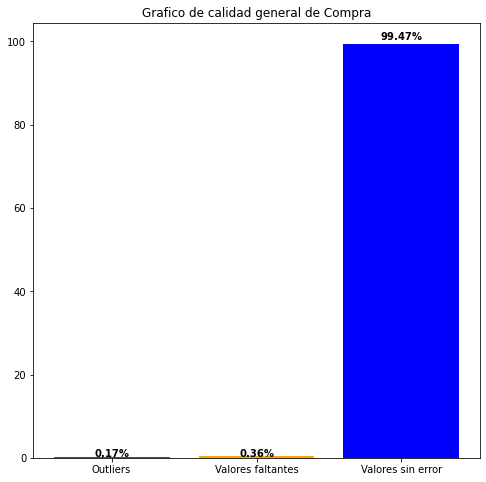

Porcentaje de valores faltantes en la tabla Compra es : 0.36 %
Porcentaje de outliers en la tabla Compra es : 0.17 %
Porcentaje de valores sin error en la tabla Compra es : 99.47 %
---------------------------------------------------


In [80]:
analisis_csv_general(compra_csv)

Esta funcion calcula de manera individual (por columna) el porcentaje de valores faltantes,outliers y de valores sin error del DataFrame ingresado

In [81]:
def analisis_csv(csv):
    for column in csv:
        
        if csv[column].dtype == 'O':    
            valores_faltantes = round((csv[column].isnull().sum() * 100) / len(csv),2 )     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
            sin_errores = round(100 - valores_faltantes,2)
            outliers = 0
        else:
            minimo = csv[column].mean() - 3*csv[column].std()          ## VARIABLES PARA CALCULAR OUTLIER 
            maximo = csv[column].mean() + 3*csv[column].std()
            outliers =  round((((len(csv[column][csv[column] < minimo]) + len(csv[column][csv[column] > maximo]))) * 100) / len(csv),2)   ## REGLA 3 SIGMAS PARA OUTLIERS
            valores_faltantes = round((csv[column].isnull().sum() * 100) / len(csv),2)     ## CALCULO DE VALORES FALTANTES Y SIN ERROR
            sin_errores = round(100 - valores_faltantes - outliers,2)

        lista = [outliers,valores_faltantes,sin_errores]    

        ##   CONFIGURACION DEL GRAFICO 
        plt.figure(figsize=(8,8))
        plt.title('Calidad de '+column)
        graph = plt.bar(['Outliers','Valores faltantes','Valores sin error'],lista,color=['Red','Orange', 'Blue'])
        i = 0
        for p in graph:           ## AGREGA EL NUMERO CON EL PORCENTAJE
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            plt.text(x+width/2,
                y+height*1.01,
                str(lista[i])+'%',
                ha='center',
                weight='bold')
            i+=1
        
        plt.show()
        
    
        print('Porcentaje de valores faltantes en la columna',column,'es :',valores_faltantes,'%')
        print('Porcentaje de outliers en la columna',column,'es :',outliers,'%')
        print('Porcentaje de valores sin error en la columna',column,'es :',sin_errores,'%')
        print('---------------------------------------------------')

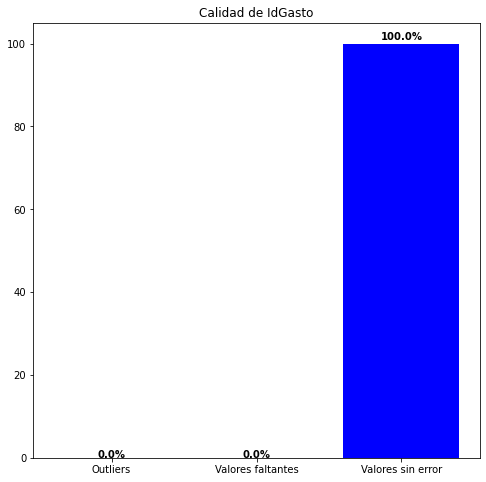

Porcentaje de valores faltantes en la columna IdGasto es : 0.0 %
Porcentaje de outliers en la columna IdGasto es : 0.0 %
Porcentaje de valores sin error en la columna IdGasto es : 100.0 %
---------------------------------------------------


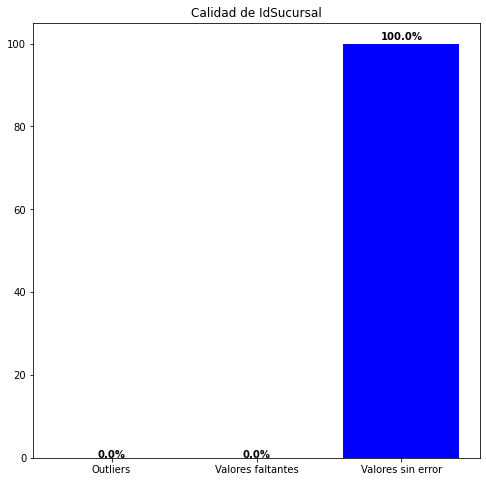

Porcentaje de valores faltantes en la columna IdSucursal es : 0.0 %
Porcentaje de outliers en la columna IdSucursal es : 0.0 %
Porcentaje de valores sin error en la columna IdSucursal es : 100.0 %
---------------------------------------------------


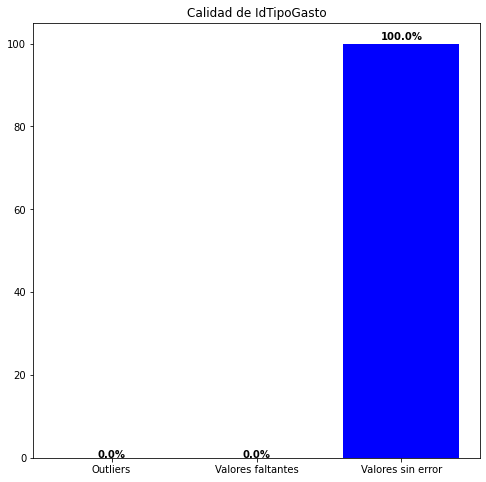

Porcentaje de valores faltantes en la columna IdTipoGasto es : 0.0 %
Porcentaje de outliers en la columna IdTipoGasto es : 0.0 %
Porcentaje de valores sin error en la columna IdTipoGasto es : 100.0 %
---------------------------------------------------


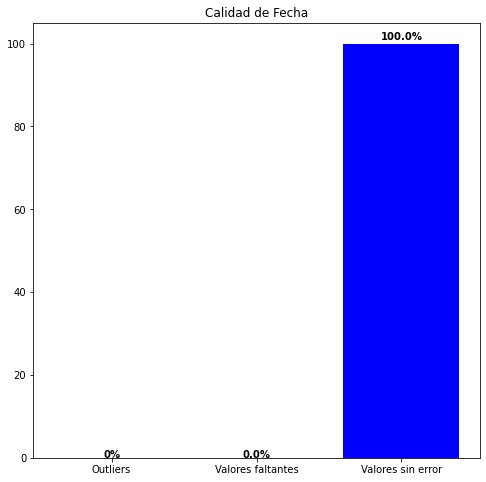

Porcentaje de valores faltantes en la columna Fecha es : 0.0 %
Porcentaje de outliers en la columna Fecha es : 0 %
Porcentaje de valores sin error en la columna Fecha es : 100.0 %
---------------------------------------------------


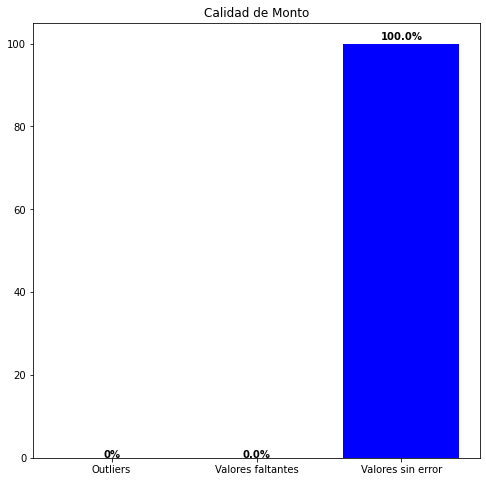

Porcentaje de valores faltantes en la columna Monto es : 0.0 %
Porcentaje de outliers en la columna Monto es : 0 %
Porcentaje de valores sin error en la columna Monto es : 100.0 %
---------------------------------------------------


In [91]:
analisis_csv(gasto_csv)

## Funciones de ETL

In [51]:
def normalizar_csv(csv):

    eliminar_columna_vacia(csv)

    llenar_nulos(csv)

    normalizar_strings(csv)

    eliminar_duplicados(csv)

    normalizar_enteros(csv)

    normalizar_floats(csv)        

    eliminar_simbolos(csv)

    eliminar_tildes(csv)

    normalizar_fechas(csv)

    # normalizar_provincias(csv) 
     
    # normalizar_localidades(csv)

    return csv

Esta funcion se encarga eliminar cualquier columna que tenga mas del 90% de datos vacios, ya que consideramos que no va a ser relevante

In [52]:
def eliminar_columna_vacia(csv): 
    for i in csv:
        columna_vacia = 0
        columna_vacia = csv[i].isnull().sum()/len(csv)
        if columna_vacia > 0.90:
            csv.drop(columns=i,inplace=True)

Esta funcion modifica los strings del archivo con una mayuscula al empezar cada palabra

In [53]:
def normalizar_strings(csv):
    for i in csv:
        if csv[i].dtype == 'O':
            csv[i] = csv[i].str.title()

Esta funcion se encarga de llenar los valores de archivos nulos, para los strings se los llena con "Sin datos" y a cualquier otro valor con un 0

In [54]:
def llenar_nulos(csv):
    for i in csv:
        if csv[i].dtype == 'O':
            csv[i] = csv[i].fillna('Sin datos')
        else:
            csv[i] = csv[i].fillna(0)

Esta funcion se encarga de eliminar los valores duplicados

In [55]:
def eliminar_duplicados(csv):
    for i in csv:
        csv[i].drop_duplicates(inplace=True)

Esta funcion se encarga de eliminar distintos simbolos en las columnas

In [56]:
def eliminar_simbolos(csv):
    for i in csv:
        csv[i] = csv[i].replace(regex='[-!#$%&()=?¡¿*]',value='')

Esta funcion elimina los tildes de las columnas

In [57]:
def eliminar_tildes(csv):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
        )
    for i in csv:
        for a, b in replacements:
            csv[i] = csv[i].replace(to_replace=a, value=b,regex=True).replace(to_replace=a.upper(),value=b.upper(),regex=True)

Esta funcion se encarga de configurar las fechas al mismo formato

In [58]:
def normalizar_fechas(csv):
    for i in csv:
        if csv[i].dtype == 'O':
            try:
                csv[i] = pd.to_datetime(csv[i],format="%Y-%m-%d")
                csv[i] = csv[i].dt.strftime('%m/%d/%Y')
            except:
                pass

Esta funcion transforma a numero entero las columnas que cumplan con las condiciones

In [59]:
def normalizar_enteros(csv):
    
    def entero(csv):
        for i in csv:
            if i == int(i):
                pass
            else:
                return False
        return True

        

    for i in csv:
        if csv[i].dtype == 'float64':
            if entero(csv[i]):
                csv[i] = csv[i].astype(int)
        else:
            pass

Esta funcion transforma en floats las columnas que cumplan con las condiciones

In [60]:
def normalizar_floats(csv):
    for i in csv:
        if csv[i].dtype in ['int64','int32']:
            pass
        else:
            try:
                csv[i] = csv[i].astype(float)
            except:
                pass

Esta funcion normaliza los nombres de las provincias

In [61]:
def normalizar_provincias(csv):

    provincias = ["Bs As","Buenos Aires", 'Catamarca', 'Chaco', 'Chubut',
                             'Corrientes', 'Entre Rios', 'Formosa','Cordoba', 'Jujuy',
                            'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro',
                            'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
                            'Tierra del Fuego','Tucuman']

    for i in csv:
        if i == "Provincia":          
            for p in provincias:
                c=0
                cv = csv[i]
                for n in cv:
                    ratio = lev(p,n,ratio_calc=True)
                    if ratio > 0.52 or n in ["Bs As","Caba","CABA"]:
                        cv[c] = p
                    else:
                        pass
                    c = c + 1

Esta funcion normaliza los nombres de las localidades 

In [62]:
def normalizar_localidades(csv):

    localidades_nombres = ['Capi Fed','Capital Federal','Ciudad De Buenos Aires','Mendoza','San Carlos De Bariloche','San Miguel De Tucuman','Cordoba','Rosario'
                            ,'Mar Del Plata','La Plata','Quilmes','Avellaneda','Lanus','San Justo',
                            'Castelar','Moron','Caseros','Martinez','Vicente Lopez']
    for i in csv:
        if i == "Localidad":
            for l in localidades_nombres:
                c=0
                cv=csv[i]
                for n in cv:
                    ratio = lev(n,l,ratio_calc=True)
                    if (ratio > 0.69) or (n in ["CABA","Cdad De Buenos Aires","Capital","Capital Federal"]):
                        cv[c] = l
                    else:
                        pass         
                    c = c + 1

Esta funcion se encarga de comparar dos palabras y devolver que tan diferentes son

In [63]:
def lev(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [21]:

def insertar_nueva_informacion(csv,csv_a_insertar):

    csv_terminado = pd.concat([csv, csv_a_insertar], axis=0)
    normalizar_csv(csv_terminado)
    csv_terminado=csv_terminado.reset_index(drop=True)

    return csv_terminado


def calcular_sucursal_nueva(csv_clientes,csv_sucursales):
    cli_loc = csvc['Localidad'].value_counts().index
    suc_loc = csvs['Localidad'].unique()
    for i in cli_loc:
        if i in suc_loc:
            pass
        else:
            return i



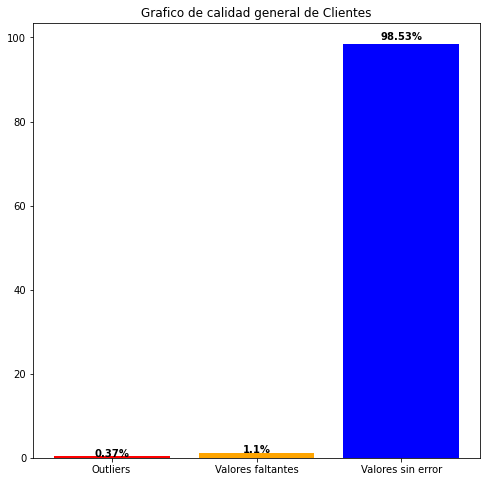

Porcentaje de valores faltantes en la tabla Clientes es : 1.1 %
Porcentaje de outliers en la tabla Clientes es : 0.37 %
Porcentaje de valores sin error en la tabla Clientes es : 98.53 %
---------------------------------------------------


In [78]:
eliminar_columna_vacia(clientes_csv)
analisis_csv_general(clientes_csv)

## Normalizacion de los CSV

In [22]:
normalizar_csv(clientes_csv)
clientes_csv.rename(columns={"ID":"IdCliente","X":"Longitud","Y":"Latitud"},inplace=True)
clientes_csv


,IdCliente,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,Longitud,Latitud
0,1,Buenos Aires,Heber Joni Santana,Las Heras Y Bat. 24 De Febrero 4150 Rincon De...,425161,58,Loma Verde,-58.818503,-34.309971
1,2,Buenos Aires,Ana Sapriza,Pueyrredon Y Dupuy Ruta3 Km 52.500 S/N Bâº Lo...,497578,61,Santa Rosa,-58.730738,-34.939083
2,3,Buenos Aires,Fernando Luis Saralegui,Calderon De La Barca 498,493435,15,Torres,-59.127941,-34.430822
3,4,Buenos Aires,Manuela Sarasola,"Ruta 36 Km 45,500 S/N El Peligro",492883,29,Ruta Sol,-58.143940,-34.920527
4,5,Buenos Aires,Mario Raul Sarasua,492 Y 186 S/N Colonia Urquiza,4914608,34,Jose Melchor Romero,-58.089381,-34.944447
...,...,...,...,...,...,...,...,...,...
2667,2668,Cordoba,Maria Stella Rivas,Calle Publica Santa Elena Colonia Tirolesa R...,4902756,23,Colonia Tirolesa,-64.074193,-31.258817
2668,2669,Cordoba,Ana Gabriela Rivas,Calle Publica S/Nâº La Arcadia,153580992,28,La Arcadia,-64.076969,-31.533384
2669,2670,Cordoba,Javier Alonso Riveiro,Avenida Libertador San Martin S/Nâº Bouwer,4993041,57,Bouwer,-64.192983,-31.557861
2670,2671,Cordoba,Juan Manuel Rodriguez,Calle Publica S/Nâ° El Gateado Barrio El Gate...,152768918,36,El Gateado,-64.116812,-31.321234


In [23]:
normalizar_csv(compra_csv)

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.5,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2
...,...,...,...,...,...,...,...,...,...
11534,11535,12/25/2020,2020,12,202012,42978,6,88.29,10
11535,11536,12/25/2020,2020,12,202012,42979,2,81.24,10
11536,11537,12/25/2020,2020,12,202012,42980,1,71.67,3
11537,11538,12/25/2020,2020,12,202012,42981,3,35.55,9


In [24]:
normalizar_csv(gasto_csv)

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,01/01/2015,1164.90
1,2,18,2,01/01/2015,317.02
2,3,18,3,01/01/2015,118.89
3,4,18,4,01/01/2015,1174.23
4,5,1,1,01/01/2015,1104.51
...,...,...,...,...,...
8635,8636,23,4,12/01/2020,1180.27
8636,8637,24,1,12/01/2020,1152.15
8637,8638,24,2,12/01/2020,305.98
8638,8639,24,3,12/01/2020,104.32


In [25]:
normalizar_csv(proveedores_csv)
proveedores_csv.rename(columns={"IDProveedor":"IdProveedor","Address":"Domicilio","City":"Localidad","State":"Provincia","Country":"Pais","departamen":"Departamento"},inplace=True)
proveedores_csv

,IdProveedor,Nombre,Domicilio,Localidad,Provincia,Pais,Departamento
0,1,Sin Datos,Bereguestein 36,Avellaneda,Buenos Aires,Argentina,Avellaneda
1,2,San Cirano,Alberti 965,Coronel Brandsen,Buenos Aires,Argentina,Brandsen
2,3,Bell S.A.,Moreno 331,Campana,Buenos Aires,Argentina,Campana
3,4,Rivero Insumos,Pte. Peron 3872,Valentin Alsina,Buenos Aires,Argentina,Lanus
4,5,Laprida Computacion,Avda. Pedro Pereyra 1339,Laprida,Buenos Aires,Argentina,Laprida
5,6,Importadora Mann Kloss,Lope De Vega 2102,Boca De Atencion Monte Castro,Caba,Argentina,Comuna 10
6,7,Fletes Y Logistica,Santa Rosa 1564,Cordoba,Cordoba,Argentina,Capital
7,8,Sin Datos,Santa Rosa 1564,Cordoba,Cordoba,Argentina,Capital
8,9,Via Chile Containers,Juan B. Justo 415,Mendoza,Mendoza,Argentina,Capital
9,10,Full Toner,Cordoba 246,Mendoza,Mendoza,Argentina,Capital


In [26]:
normalizar_csv(sucursales_csv)
sucursales_csv.rename(columns={"ID":"IdSucursal","Direccion":"Domicilio"},inplace=True)
sucursales_csv

,IdSucursal,Sucursal,Domicilio,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad De Buenos Aires,Ciudad De Buenos Aires,-34.567806,-58.449572
1,2,Palermo 1,Guatemala 5701,Caba,Caba,-34.579035,-58.433566
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,Caba,C Debuenos Aires,-34.595966,-58.405150
3,4,Corrientes,Av. Corrientes 2352,Ciudad De Buenos Aires,Bs As,-34.604685,-58.398764
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,-34.617308,-58.416179
5,6,Caballito,Av. Rivadavia 4708,Capital Federal,Ciudad De Buenos Aires,-34.616303,-58.431849
6,7,Flores,Av. Rivadavia 5746,Capfed,Buenos Aires,-34.622868,-58.446449
7,8,Alberdi,Av. Juan Bautista Alberdi 1634,Cap. Fed.,Buenos Aires,-34.627306,-58.451498
8,9,Deposito,Pedernera 530,Cap. Federal,Buenos Aires,-34.635134,-58.461513
9,10,Velez,Av. Juan Bautista Justo 7738,Cdad De Buenos Aires,Ciudad De Buenos Aires,-34.631257,-58.498063


In [27]:
normalizar_csv(venta_csv)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,03/09/2018,03/17/2018,3,969,13,1674,42817,813.12,2
1,2,12/28/2018,12/29/2018,2,884,13,1674,42795,543.18,3
2,3,03/28/2016,03/31/2016,2,1722,13,1674,42837,430.32,1
3,4,10/23/2017,10/24/2017,3,2876,13,1674,42834,818.84,2
4,5,11/22/2017,11/25/2017,2,678,13,1674,42825,554.18,3
...,...,...,...,...,...,...,...,...,...,...
46175,47596,11/30/2020,12/09/2020,1,193,26,3032,42850,279,2
46176,47597,11/30/2020,12/07/2020,3,333,26,3193,42799,1536.04,2
46177,47598,11/30/2020,12/07/2020,1,2389,27,3667,42916,1356,2
46178,47599,11/30/2020,12/04/2020,1,1067,29,3836,42935,2456,1


In [28]:
normalizar_csv(canaldeventa_csv)
canaldeventa_csv.rename(columns={"CODIGO":"IdCanal","DESCRIPCION":"TipoCanal"},inplace=True)
canaldeventa_csv

,IdCanal,TipoCanal
0,1,Telefonica
1,2,Online
2,3,Presencial


In [29]:
normalizar_csv(tipogasto_csv)
tipogasto_csv.rename(columns={"Descripcion":"TipoGasto","Monto_Aproximado":"Monto"},inplace=True)
tipogasto_csv

,IdTipoGasto,TipoGasto,Monto
0,1,Alquiler,1000
1,2,Servicios,300
2,3,Impuestos,100
3,4,Sueldos Y Jornales,1000


In [30]:
# print("Que queres hacer? ")
# print("1- Cargar informacion por primera vez")
# print("2- Actualizar informacion")
# opcion = int(input())
# print("-------------------------------------")
# if opcion == 1:
#     c = 0
#     print("Que archivo queres cargar?")
#     for i in datasets_sin_cargar():
#         c = c + 1
#         print(c,"- ",i)
#     c = int(input())
#     print("-------------------------------------")
#     csv_para_cargar = datasets_sin_cargar()[c-1]
    
#     csv  = pd.read_csv('Datasets/'+csv_para_cargar,delimiter=';',decimal=',')

#     normalizar_csv(csv).to_csv("Datasets_Norm/"+csv_para_cargar,index=False)
# else:
#     c = 0
#     print("Que archivo queres actualizar?")
#     for i in datasets_cargados():
#         c = c + 1
#         print(c,"- ",i)
#     c = int(input())
#     print("-------------------------------------")
#     csv_para_actualizar = datasets_cargados()[c-1]

#     print("Con que archivo queres actualizarlo?")
#     c = 0
#     for i in datasets_sin_cargar():
#         c = c + 1
#         print(c,"- ",i)
#     c = int(input())
#     print("-------------------------------------")
#     csv_delta = datasets_sin_cargar()[c-1]

#     csv_a = pd.read_csv('Datasets_Norm/'+csv_para_actualizar,delimiter=';',decimal=',')
#     csv_d = pd.read_csv('Datasets/'+csv_delta,delimiter=';',decimal=',')

#     csv_a = insertar_nueva_informacion(csv_a,csv_d)

#     csv_a.to_csv("Datasets_Norm/"+csv_para_actualizar,index=False)
#     csv_d.to_csv("Datasets/"+csv_delta,index=False)






    


    
    
        

In [31]:
from os import listdir
from os.path import isfile, join

def ls(ruta = '.'):
    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]

In [32]:
def datasets_sin_cargar():
    lista = []
    for i in ls('Datasets'):
        if i in ls('Datasets_Norm'):
            pass    
        else:
            lista.append(i)
    return lista

def datasets_cargados():
    lista = []
    for i in ls('Datasets'):
        if i in ls('Datasets_Norm'):
            lista.append(i)
        else:
            pass
    return lista



